# Plotting for Exploratory data analysis (EDA)

* Exploratory Data Analysis (EDA) is an approach that is used to analyze the data and discover trends, patterns, or check     assumptions in data with the help of statistical summaries and graphical representations. 


* Types of EDA -- 

1. Univariate Analysis – In univariate analysis, we analyze or deal with only one variable at a time. The analysis of univariate data is thus the simplest form of analysis since the information deals with only one quantity that changes. It does not deal with causes or relationships and the main purpose of the analysis is to describe the data and find patterns that exist within it.

2. Bi-Variate analysis – This type of data involves two different variables. The analysis of this type of data deals with causes and relationships and the analysis is done to find out the relationship between the two variables.

3. Multivariate Analysis  – When the data involves three or more variables, it is categorized under multivariate.

* Depending on the type of analysis we can also subcategorize EDA into two parts. 

1. Non-graphical Analysis – In non-graphical analysis, we analyze data using statistical tools like mean median or mode or skewness.

2. Graphical Analysis – In graphical analysis, we use visualizations charts to visualize trends and patterns in the data.

# Haberman's Survival Data Set

*  Haberman Cancer Survival dataset -- (https://www.kaggle.com/gilsousa/habermans-survival-data-set)

* The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

* The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

* Number of Instances: 306

* Number of Attributes: 4 (including the class attribute)

* Attribute Information:

* Age of patient at time of operation (numerical)

* Patient's year of operation (year - 1900, numerical)

* Number of positive axillary nodes detected (numerical)

* Survival status (class attribute) -- 
1 = the patient survived 5 years or longer ;
2 = the patient died within 5 year

* Objective: Classify a new Survival status as belonging to one of the 2 classes given the 3 features.
* Importance of domain knowledge.
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards                     classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in                         classfication.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from statsmodels import robust

In [2]:
haberman = pd.read_csv("haberman.csv")

In [3]:
haberman.head()

,age,op_year,axil_nodes,surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
haberman.tail()

,age,op_year,axil_nodes,surv_status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [5]:
haberman["surv_status"].unique()

array([1, 2], dtype=int64)

In [6]:
haberman.shape

(306, 4)

features = age, op_year, axil_nodes	

label = surv_status

In [7]:
haberman.columns

Index(['age', 'op_year', 'axil_nodes', 'surv_status'], dtype='object')

In [8]:
haberman["surv_status"].value_counts()

1    225
2     81
Name: surv_status, dtype: int64

#### Observation:

* Haberman is an Imbalanced Dataset involving "surv_status" as 1 & 2 with 225 & 81 respectively.

# 2-D Scatter Plot

<AxesSubplot:xlabel='age', ylabel='op_year'>

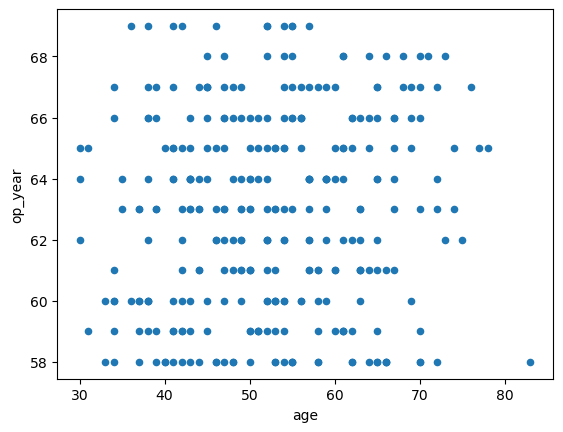

In [9]:
haberman.plot(kind='scatter', x='age', y='op_year')

<AxesSubplot:xlabel='age', ylabel='axil_nodes'>

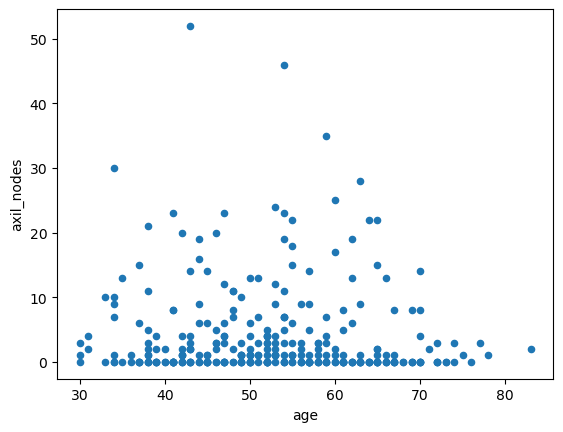

In [10]:
haberman.plot(kind='scatter', x='age', y='axil_nodes')

<AxesSubplot:xlabel='op_year', ylabel='axil_nodes'>

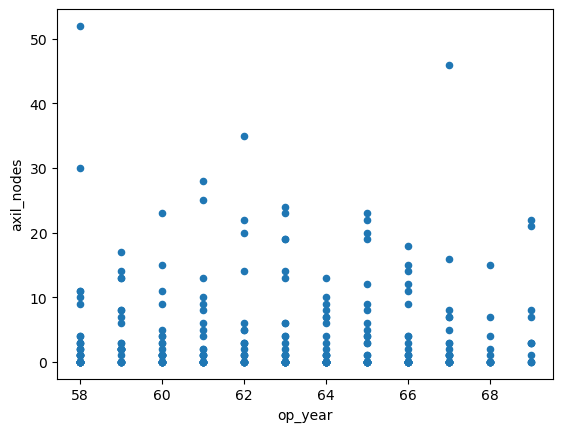

In [11]:
haberman.plot(kind='scatter', x='op_year', y='axil_nodes')

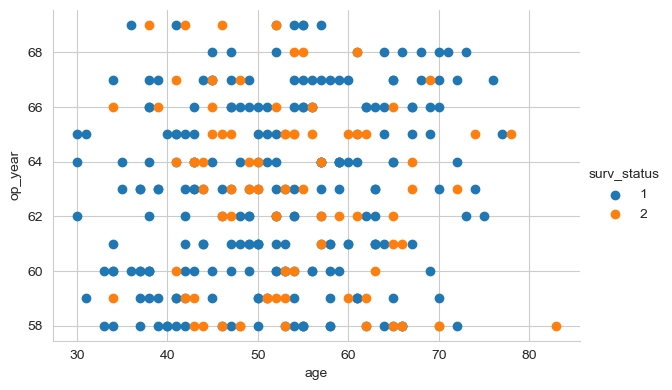

In [12]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="surv_status", size=4, aspect=1.5) \
   .map(plt.scatter, 'age', 'op_year') \
   .add_legend()

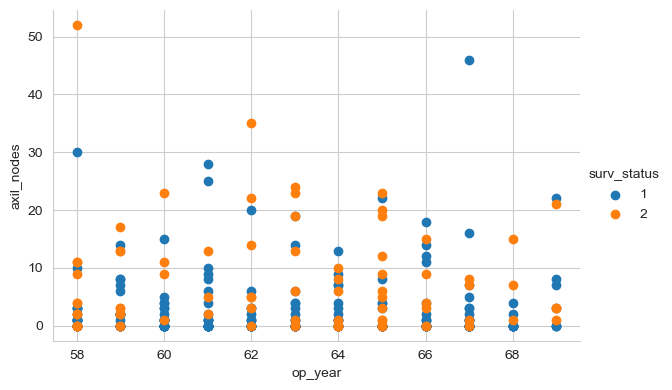

In [13]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="surv_status", size=4, aspect=1.5) \
   .map(plt.scatter, 'op_year', 'axil_nodes') \
   .add_legend()

#### Observation(s):

* Using Scatterplot, we couldn't distinguish surv_status.

# Pair Plot

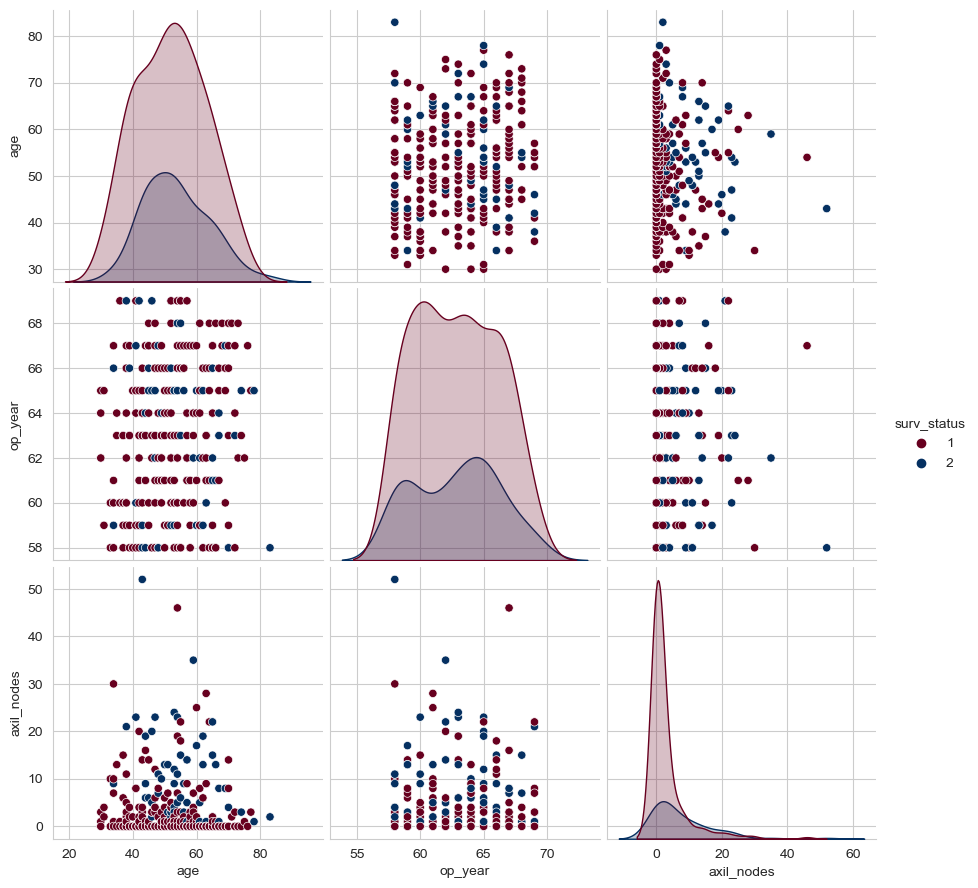

In [14]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="surv_status",  size=3, palette = "RdBu")

#### Observations

1. surv_status 1 & 2 are overlapping for most of the cases.
2. op_year is most useful features to identify the density of different surv_status.
3. we can't use simple if else condition to build simple model.

# Histogram, PDF, CDF

In [15]:
haberman.columns

Index(['age', 'op_year', 'axil_nodes', 'surv_status'], dtype='object')

In [16]:
haberman_1 = haberman.loc[haberman["surv_status"] == 1];
haberman_2 = haberman.loc[haberman["surv_status"] == 2];

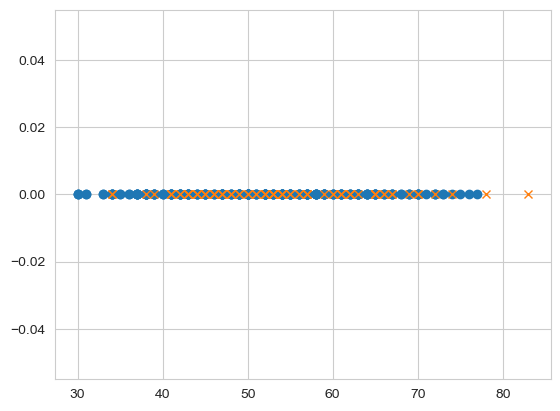

In [17]:
#1-D scatter plot of age

plt.plot(haberman_1["age"], np.zeros_like(haberman_1['age']), 'o')
plt.plot(haberman_2["age"], np.zeros_like(haberman_2['age']), 'x')

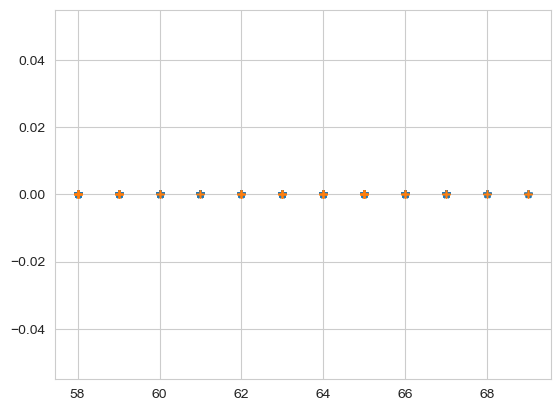

In [18]:
#1-D scatter plot of op_year

plt.plot(haberman_1["op_year"], np.zeros_like(haberman_1['op_year']), '*')
plt.plot(haberman_2["op_year"], np.zeros_like(haberman_2['op_year']), '+')

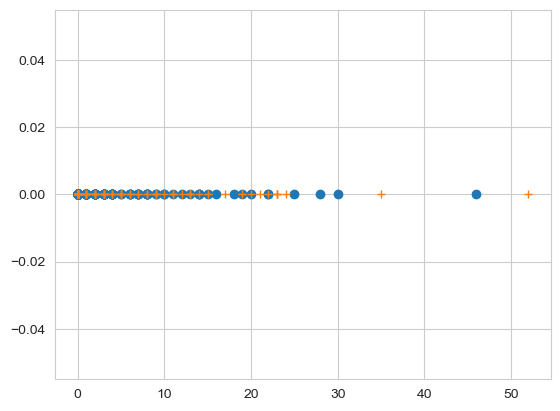

In [19]:
#1-D scatter plot of axil_nodes

plt.plot(haberman_1["axil_nodes"], np.zeros_like(haberman_1['axil_nodes']), 'o')
plt.plot(haberman_2["axil_nodes"], np.zeros_like(haberman_2['axil_nodes']), '+')

#### Observation(s)

1. Disadvantages of 1-D scatter plot: Very hard to make sense as points.
2. The points are overlapping for age & axil_nodes.
3. In case of op_year, the points are exactly the same.

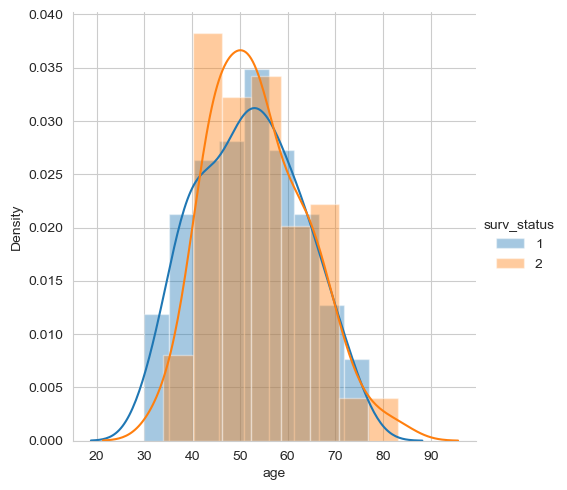

In [20]:
#PDF plot of age

sns.FacetGrid(haberman, hue="surv_status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend()

In [21]:
haberman.groupby("surv_status")["age"].min()

surv_status
1    30
2    34
Name: age, dtype: int64

In [22]:
haberman.groupby("surv_status")["age"].max()

surv_status
1    77
2    83
Name: age, dtype: int64

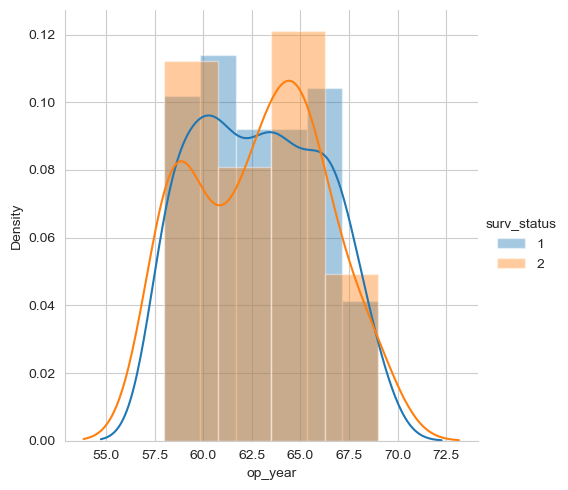

In [23]:
#PDF plot of surv_status

sns.FacetGrid(haberman, hue="surv_status", size=5) \
   .map(sns.distplot, "op_year") \
   .add_legend()

In [24]:
haberman.groupby("surv_status")["op_year"].min()

surv_status
1    58
2    58
Name: op_year, dtype: int64

In [25]:
haberman.groupby("surv_status")["op_year"].max()

surv_status
1    69
2    69
Name: op_year, dtype: int64

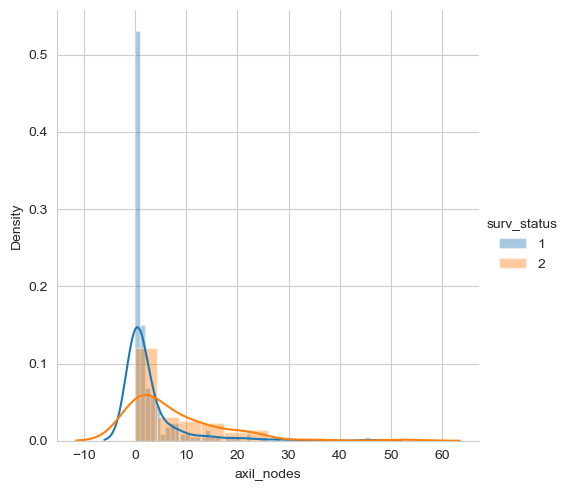

In [26]:
#PDF plot of axil_nodes

sns.FacetGrid(haberman, hue="surv_status", size=5) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend()

In [27]:
haberman.groupby("surv_status")["axil_nodes"].min()

surv_status
1    0
2    0
Name: axil_nodes, dtype: int64

In [28]:
haberman.groupby("surv_status")["axil_nodes"].max()

surv_status
1    46
2    52
Name: axil_nodes, dtype: int64

#### Observation(s)

1. For age, the density is slightly higher for 2, but overall same. 
2. The min & max status of 1 is slightly lower than 2.
3. For op_year, the density completely overlaps each other. 
4. The op-year is exactly the same for min & max.
5. For axil_nodes, 1 has clearly higher density than 2.
6. Although, the min is exactly the same, the max axil_nodes of 2 is higher than 1.


In [29]:
counts, bin_edges = np.histogram(haberman_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

In [30]:
pdf

array([0.05333333, 0.10666667, 0.12444444, 0.09333333, 0.16444444,
       0.16444444, 0.09333333, 0.11111111, 0.06222222, 0.02666667])

In [31]:
bin_edges

array([30. , 34.7, 39.4, 44.1, 48.8, 53.5, 58.2, 62.9, 67.6, 72.3, 77. ])

In [32]:
cdf = np.cumsum(pdf)

In [33]:
cdf

array([0.05333333, 0.16      , 0.28444444, 0.37777778, 0.54222222,
       0.70666667, 0.8       , 0.91111111, 0.97333333, 1.        ])

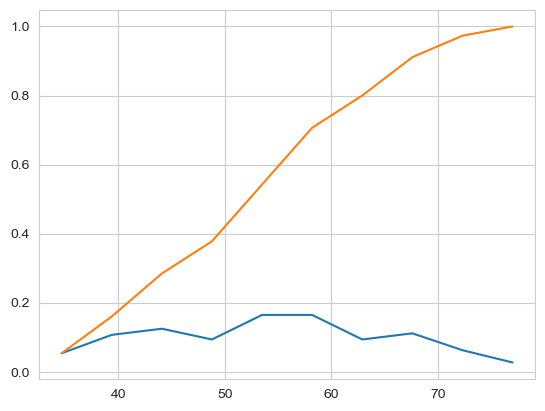

In [34]:
#plot CDF of age

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

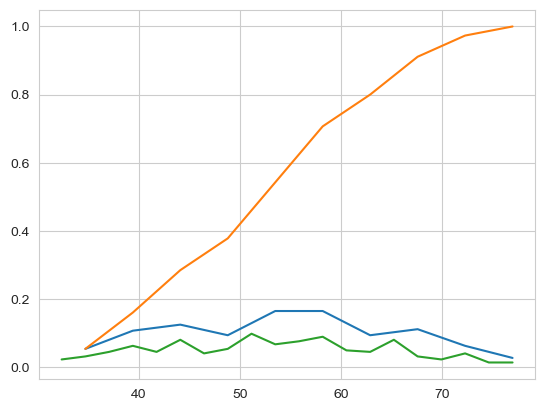

In [35]:
#plot CDF of age

counts, bin_edges = np.histogram(haberman_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(haberman_1['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))

plt.plot(bin_edges[1:],pdf)

surv_status 1:-- 
PDF: [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667] 
Bin Edges: [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ] 
CDF: [0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]
surv_status 2:-- 
PDF: [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568] 
Bin Edges: [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ] 
CDF: [0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]


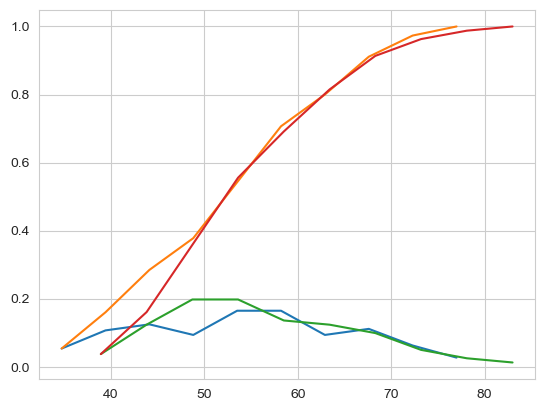

In [36]:
#plots CDF of age for various surv_status


#surv_status 1

counts, bin_edges = np.histogram(haberman_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
print("surv_status 1:--", "\nPDF:", pdf, "\nBin Edges:", bin_edges, "\nCDF:", cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#surv_status 2

counts, bin_edges = np.histogram(haberman_2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
print("surv_status 2:--", "\nPDF:", pdf, "\nBin Edges:", bin_edges, "\nCDF:", cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

#### Observations For age

1. PDF is higher for surv_status 2.
2. Bin edges are higher for surv_status 2.
3. CDF is higher for surv_status 2.

surv_status 1:-- 
PDF: [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556] 
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ] 
CDF: [0.18666667 0.29333333 0.39555556 0.46666667 0.56444444 0.66666667
 0.73333333 0.83111111 0.92444444 1.        ]
surv_status 2:-- 
PDF: [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975] 
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ] 
CDF: [0.25925926 0.30864198 0.34567901 0.43209877 0.5308642  0.62962963
 0.79012346 0.86419753 0.91358025 1.        ]


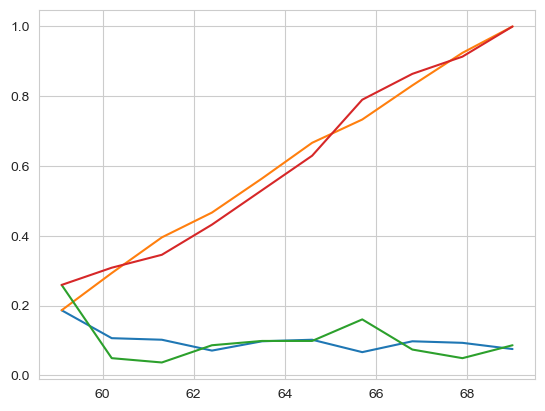

In [37]:
#plots CDF of op_year for various surv_status


#surv_status 1

counts, bin_edges = np.histogram(haberman_1['op_year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
print("surv_status 1:--", "\nPDF:", pdf, "\nBin Edges:", bin_edges, "\nCDF:", cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#surv_status 2

counts, bin_edges = np.histogram(haberman_2['op_year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
print("surv_status 2:--", "\nPDF:", pdf, "\nBin Edges:", bin_edges, "\nCDF:", cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

#### Observations For op_year

1. PDF is higher for surv_status 1.
2. Bin edges are exactly the same for both surv_status 1 & 2.

surv_status 1:-- 
PDF: [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444] 
Bin Edges: [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ] 
CDF: [0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]
surv_status 2:-- 
PDF: [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568] 
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ] 
CDF: [0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


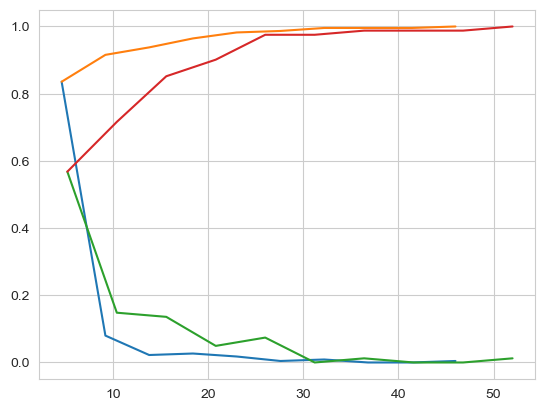

In [38]:
#plots CDF of axil_nodes for various surv_status


#surv_status 1

counts, bin_edges = np.histogram(haberman_1['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
print("surv_status 1:--", "\nPDF:", pdf, "\nBin Edges:", bin_edges, "\nCDF:", cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#surv_status 2

counts, bin_edges = np.histogram(haberman_2['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
print("surv_status 2:--", "\nPDF:", pdf, "\nBin Edges:", bin_edges, "\nCDF:", cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

#### Observations For axil_nodes

1. PDF is higher for surv_status 1.
2. Bin edges are higher for surv_status 2.
3. CDF is higher for surv_status 1.

# Median, Percentile, Quantile, IQR, MAD

In [39]:
#Median

print("\nMedians of age:")
print("surv_status 1:",np.median(haberman_1["age"]))
print("surv_status 2:",np.median(haberman_2["age"]))

#Median with an outlier

print("\nMedians of age with an outlier:")
print("surv_status 1:",np.median(np.append(haberman_1["age"],500)))
print("surv_status 2:",np.median(np.append(haberman_2["age"],500)))


Medians of age:
surv_status 1: 52.0
surv_status 2: 53.0

Medians of age with an outlier:
surv_status 1: 52.0
surv_status 2: 53.0


In [40]:
print("\nMedians of op_year:")
print("surv_status 1:",np.median(haberman_1["op_year"]))
print("surv_status 2:",np.median(haberman_2["op_year"]))

print("\nMedians of op_year with an outlier:")
print("surv_status 1:",np.median(np.append(haberman_1["op_year"],500)))
print("surv_status 2:",np.median(np.append(haberman_2["op_year"],500)))


Medians of op_year:
surv_status 1: 63.0
surv_status 2: 63.0

Medians of op_year with an outlier:
surv_status 1: 63.0
surv_status 2: 63.0


In [41]:
print("\nMedians of axil_nodes:")
print("surv_status 1:",np.median(haberman_1["axil_nodes"]))
print("surv_status 2:",np.median(haberman_2["axil_nodes"]))

print("\nMedians of axil_nodes with an outlier:")
print("surv_status 1:",np.median(np.append(haberman_1["axil_nodes"],500)))
print("surv_status 2:",np.median(np.append(haberman_2["axil_nodes"],500)))


Medians of axil_nodes:
surv_status 1: 0.0
surv_status 2: 4.0

Medians of axil_nodes with an outlier:
surv_status 1: 0.0
surv_status 2: 4.0


In [42]:
# Quantiles

print("\nQuantiles for age:")
print(np.percentile(haberman_1["age"],np.arange(0, 100, 25)))
print(np.percentile(haberman_2["age"],np.arange(0, 100, 25)))


Quantiles for age:
[30. 43. 52. 60.]
[34. 46. 53. 61.]


In [43]:
print("\nQuantiles for op_year:")
print(np.percentile(haberman_1["op_year"],np.arange(0, 100, 25)))
print(np.percentile(haberman_2["op_year"],np.arange(0, 100, 25)))


Quantiles for op_year:
[58. 60. 63. 66.]
[58. 59. 63. 65.]


In [44]:
print("\nQuantiles for axil_nodes:")
print(np.percentile(haberman_1["axil_nodes"],np.arange(0, 100, 25)))
print(np.percentile(haberman_2["axil_nodes"],np.arange(0, 100, 25)))


Quantiles for axil_nodes:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]


In [45]:
# Percentiles

print("\n90th Percentiles for age:")
print(np.percentile(haberman_1["age"],90))
print(np.percentile(haberman_2["age"],90))


90th Percentiles for age:
67.0
67.0


In [46]:
print("\n90th Percentiles for op_year:")
print(np.percentile(haberman_1["op_year"],90))
print(np.percentile(haberman_2["op_year"],90))


90th Percentiles for op_year:
67.0
67.0


In [47]:
print("\n90th Percentiles for axil_nodes:")
print(np.percentile(haberman_1["axil_nodes"],90))
print(np.percentile(haberman_2["axil_nodes"],90))


90th Percentiles for axil_nodes:
8.0
20.0


In [48]:
#Median Absolute Deviation 

print ("\nMedian Absolute Deviation for age")
print(robust.mad(haberman_1["age"]))
print(robust.mad(haberman_2["age"]))


Median Absolute Deviation for age
13.343419966550417
11.860817748044816


In [49]:
print ("\nMedian Absolute Deviation for op_year")
print(robust.mad(haberman_1["op_year"]))
print(robust.mad(haberman_2["op_year"]))


Median Absolute Deviation for op_year
4.447806655516806
4.447806655516806


In [50]:
print ("\nMedian Absolute Deviation for axil_nodes")
print(robust.mad(haberman_1["axil_nodes"]))
print(robust.mad(haberman_2["axil_nodes"]))


Median Absolute Deviation for axil_nodes
0.0
5.930408874022408


In [51]:
# mean and median when no outier is present
print(np.mean(haberman_1["age"]))
print(np.median(haberman_1["age"]))

52.01777777777778
52.0


In [52]:
# mean and median when outier is present, #5000 is the outlier
print(np.mean(np.append(haberman_1["age"],5000)))
print(np.median(np.append(haberman_1["age"], 5000)))

73.91150442477876
52.0


#### Observations:

    
1. For outlier treatment median is preferable compared to mean because median remains the same for outlier whereas mean value      changes.
2. Median is almost same for age & op_year for surv status 1 & 2.
3. Median is higher for surv status 2 in case of axil_nodes.
4. Quartiles are higher for surv_status 2 in case of age & axil_nodes, but almost same for op_year.
5. 90th Percentile for age & op_year is same, but higher for surv_status 2 in case of axil_nodes.
6. Median Absolute Deviation is slightly higher for surv_status 1 in case of age, but exactly the same in case of op_year.
7. Median Absolute Deviation is really high for surv_status 2 in case of axil_nodes.

# Box plot and Whiskers

In [53]:
#l, iqr, wl & wu for age
l = np.percentile(haberman_1["age"],np.arange(25, 100, 25))
l

array([43., 52., 60.])

In [54]:
#iqr for age
iqr = l[-1]-l[0]
iqr

17.0

In [55]:
#whisker lower & whisker upper for age
wl = l[0]-1.5*iqr 
wu = l[-1]+1.5*iqr
print(wl)
print(wu)

17.5
85.5


<AxesSubplot:xlabel='surv_status', ylabel='age'>

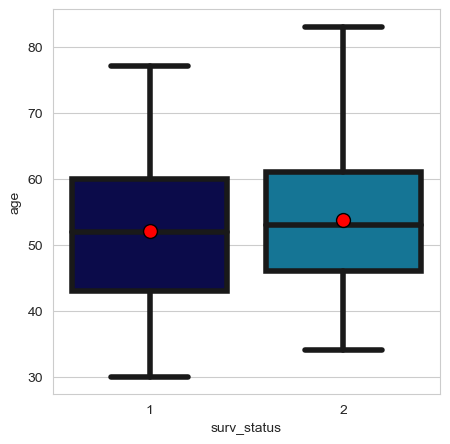

In [56]:
#box plot of age
plt.figure(figsize= (5,5))
sns.boxplot(x='surv_status',y='age', data= haberman, whis = 1.5, palette = 'ocean',
            showmeans=True, meanprops= {"marker":"o", "markerfacecolor":"red","markersize":"10", "markeredgecolor":"black"}
           ,linewidth= 4)

<AxesSubplot:xlabel='surv_status', ylabel='op_year'>

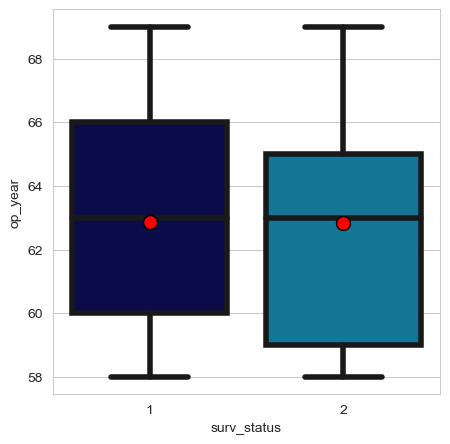

In [57]:
#box plot of op_year
plt.figure(figsize= (5,5))
sns.boxplot(x='surv_status',y='op_year', data= haberman, whis = 1.5, palette = 'ocean',
            showmeans=True, meanprops= {"marker":"o", "markerfacecolor":"red","markersize":"10", "markeredgecolor":"black"}
           ,linewidth= 4)

<AxesSubplot:xlabel='surv_status', ylabel='axil_nodes'>

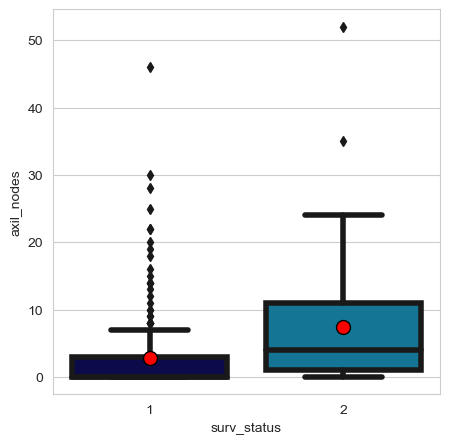

In [58]:
#box plot of axil_nodes
plt.figure(figsize= (5,5))
sns.boxplot(x='surv_status',y='axil_nodes', data= haberman, whis = 1.5, palette = 'ocean',
           showmeans=True, meanprops= {"marker":"o", "markerfacecolor":"red","markersize":"10", "markeredgecolor":"black"}
           ,linewidth= 4)

In [59]:
l = np.percentile(haberman_1["axil_nodes"],np.arange(25, 100, 25))
l

array([0., 0., 3.])

In [60]:
iqr = l[-1]-l[0]
iqr

3.0

In [61]:
wl = l[0]-1.5*iqr
wu = l[-1]+1.5*iqr
print(wl)
print(wu)

-4.5
7.5


<AxesSubplot:xlabel='surv_status', ylabel='axil_nodes'>

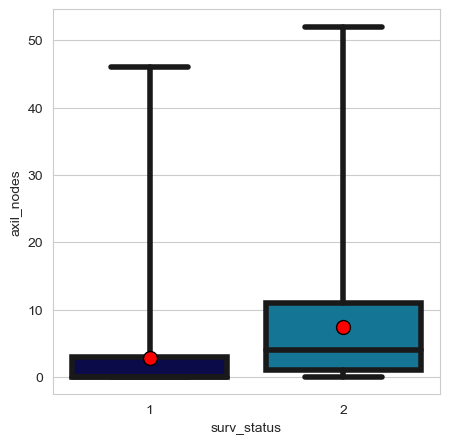

In [62]:
#box plot of axil_nodes for outlier treatment
plt.figure(figsize= (5,5))
sns.boxplot(x='surv_status',y='axil_nodes', data= haberman, whis = 14.5, palette = 'ocean'
           ,showmeans=True, meanprops= {"marker":"o", "markerfacecolor":"red","markersize":"10", "markeredgecolor":"black"}
           ,linewidth= 4)

#### Observations

1. By observing boxplots, there are no outlier for age & op_year.
2. There are numerous outliers for axil_nodes in the boxplot.
3. For outlier treatment, whisker is increased based on whisker upper & lower length.
4. Mean is in the upper range in axil_nodes for both surv_status, but for age & op_year mean value is approx in the middle part.

# Violin plots

<AxesSubplot:xlabel='surv_status', ylabel='axil_nodes'>

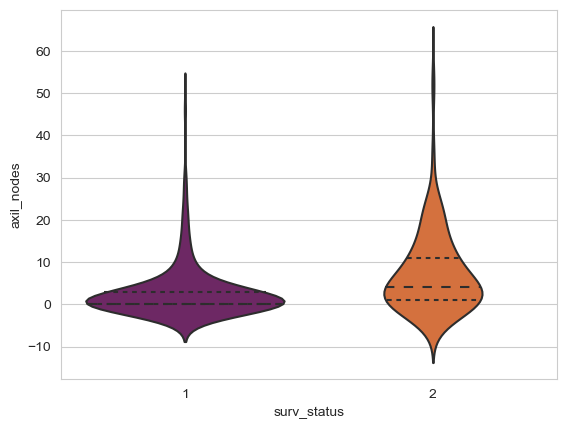

In [63]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser ones thinner in a violin plot

sns.violinplot(x='surv_status',y='axil_nodes', data= haberman, size=8, split= True, inner= "quartile", bw = 0.5, cut = 3, 
               palette = "inferno")

#### Observations:
    
* For axil_nodes surv_status 1 is more densed compared to surv_status 2 in this Violin Plot.
* Q2 quartile is the most densely populated in the surv_status 1.

# Multivariate probability density, contour plot

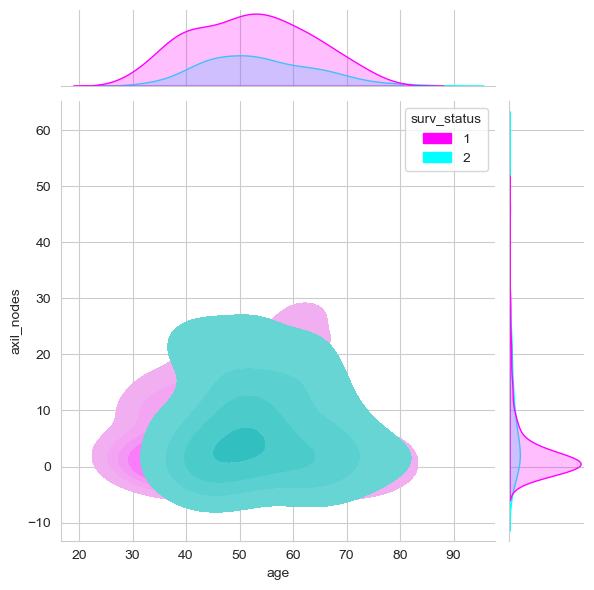

In [64]:
#2D Density plot, contors-plot
sns.jointplot(x="age", y="axil_nodes", data=haberman, kind="kde", hue = "surv_status", palette = "cool_r",fill = True)

<AxesSubplot:xlabel='axil_nodes', ylabel='Density'>

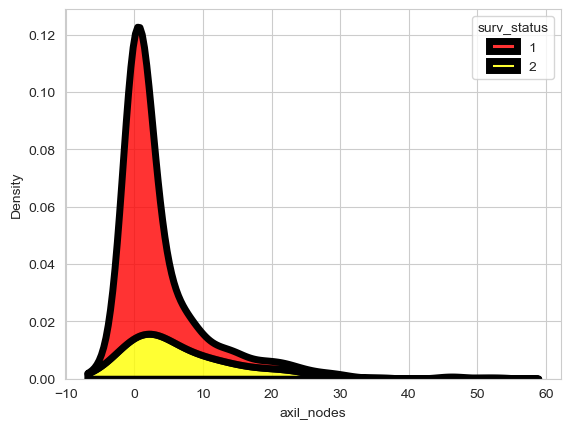

In [65]:
sns.kdeplot(data= haberman,x='axil_nodes',hue='surv_status',multiple='stack',linewidth=5,palette='autumn',
            edgecolor = "black", alpha = 0.8) 

#### Observations:

1. For age & axil_nodes in kde plot, surv_status 1 & 2 have different distributions.
2. surv_status 1 has higher value for both age & axil_nodes.
3. Density is higher for surv_status 1.

# Strip Plots

<AxesSubplot:xlabel='surv_status', ylabel='axil_nodes'>

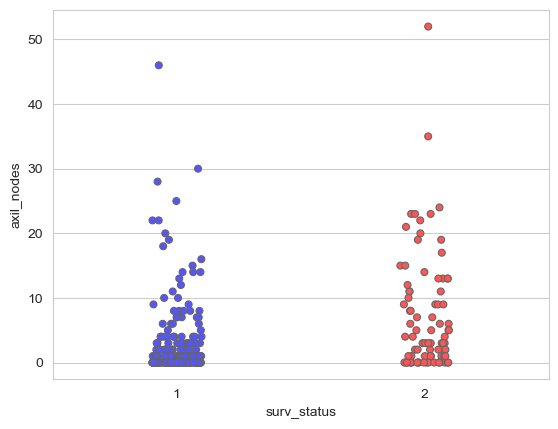

In [66]:
sns.stripplot( x='surv_status',y='axil_nodes', data=haberman, linewidth= 0.8, palette = "seismic")

<AxesSubplot:xlabel='surv_status', ylabel='axil_nodes'>

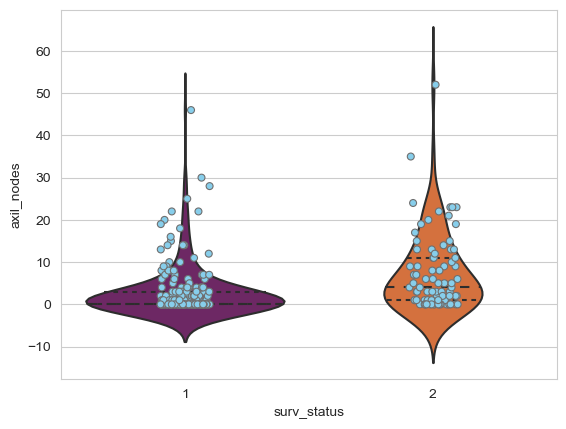

In [67]:
sns.violinplot(x='surv_status',y='axil_nodes', data= haberman, size=8, split= True, inner= "quartile", bw = 0.5, cut = 3, 
               palette = "inferno")
sns.stripplot( x='surv_status',y='axil_nodes', data=haberman, linewidth= 0.8, dodge= True, color = "skyblue")

#### Observations

1. The axil_nodes has a range of 0 to 30 for surv_status 1 & 0 to 25 for surv_status 2 excluding the outliers.
2. Q2 quartile has the most density for axil_nodes.
3. Compared to surv_status 2, surv_status 1 is more dense.

# Combining Rug plot with Scatterplot & KDE Plot

<AxesSubplot:xlabel='age', ylabel='axil_nodes'>

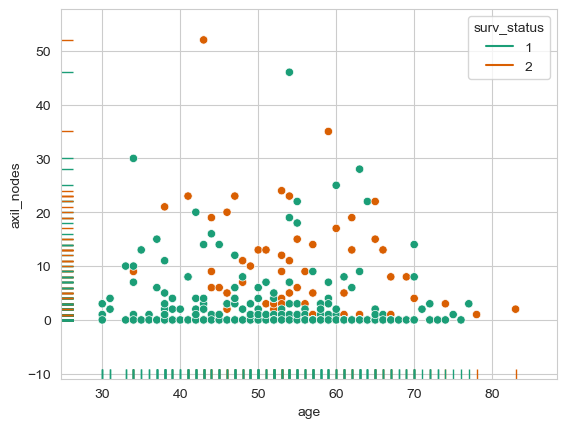

In [69]:
sns.scatterplot(data=haberman, x='age', y='axil_nodes', hue='surv_status', palette='Dark2')
sns.rugplot(data=haberman, x='age', y='axil_nodes', hue='surv_status', palette='Dark2')

<AxesSubplot:xlabel='age', ylabel='axil_nodes'>

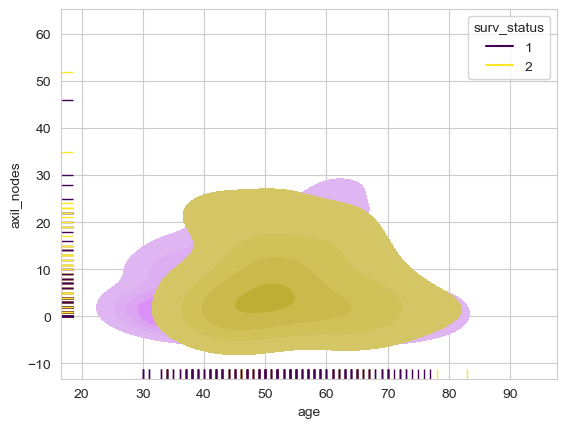

In [70]:
sns.kdeplot(data=haberman, x='age', y='axil_nodes', hue='surv_status', palette='viridis',fill= True)
sns.rugplot(data=haberman, x='age', y='axil_nodes', hue='surv_status', palette='viridis')

#### Observations

1. Combining Rugplot with kdeplot & sctterplot, it can be seen that surv_status 1 & 2 are overlapping with each other on    multiple ocassions.
2. For surv_status 1, there is a probability that if the age is 30 survival rate is high with less number of axil_nodes.
3. For most cases, age range is almost 22 to 80 & axil_nodes range is -5 to 30.

# Conclusion

* Variuos statistical analysis is performed, including non graphical (Mean, Median, Percentile, Quantile, IQR, Median Absolute Deviation) & graphical (visualizations) analysis.

* Univaraite analysis(PDF, CDF, Boxplot, Voilin plots, Strip Plots), Bi-variate analysis (scatter plots, pair-plots) & Multivariate analysis(probability density, contour plot, Rugplot) is performed.

* There are two Survival status (class attribute) : 1 = the patient survived 5 years or longer, 2 = the patient died within 5 year.

* Based on the analysis, it's derived that axil_nodes is the best suited feature for classifiaction.

* Haberman is an Imbalanced Dataset involving "surv_status" as 1 & 2 with 225 & 81 respectively.

* 1D & 2D Scatterplots & Pair plots are not very useful, neither is simple if else condition.

* PDF plot is useful to determine probability density; PDF is higher for surv_status 1.

* For outlier treatment median is preferable compared to mean because median remains the same for outlier whereas mean value changes.

* Median, Quartile, 90th Percentile & Median Absolute Deviation are higher for surv_status 2.

* Boxplot is useful for outlier treatment; for outlier treatment, whisker is increased based on whisker upper & lower length.

* From Boxplot, it can be seen that Mean is in the upper range.

* In Violin Plot surv_status 1 is more densed compared to surv_status 2; Q2 quartile is the most densely populated region.

* Observing Multivariate KDE plot, surv_status 1 has higher value for both age & axil_nodes; surv_status 1 is more dense.

* The axil_nodes has a range of 0 to 30 for surv_status 1 & 0 to 25 for surv_status 2 excluding the outliers.

* Combining Rugplot with kdeplot & sctterplot, it can be seen that surv_status 1 & 2 are overlapping with each other on multiple ocassions.

* For surv_status 1, there is a probability that if the age is 30 survival rate is higher with less number of axil_nodes.

* For most cases, age range is almost 22 to 80 & axil_nodes range is -5 to 30.